Generating the data ! 

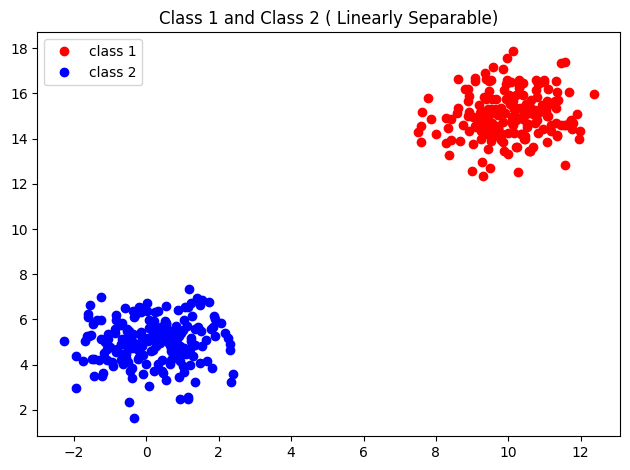

In [1]:
import numpy as np
import matplotlib.pyplot as plt
SEED = 0
np.random.seed(SEED)

COV_MATRIX = np.array([[1, 0.1], [0.1, 1]]) 

CLASS_1 = np.random.multivariate_normal([10, 15], COV_MATRIX, size=200) #generate for us (x1, x2) for class 1
CLASS_2 = np.random.multivariate_normal([0,5 ], COV_MATRIX, size=200) #generate for us (x1, x2) for class 2

plt.plot(CLASS_1[:, 0], CLASS_1[:, 1], 'ro',label = "class 1")
plt.plot(CLASS_2[:, 0], CLASS_2[:, 1], 'bo',label = "class 2")
plt.legend(loc = 'upper left')
plt.title("Class 1 and Class 2 ( Linearly Separable)")
plt.tight_layout()
plt.show()

y_train = np.concatenate((np.ones(200), 2*np.ones(200)), axis=0)
X_train  = np.concatenate((CLASS_1, CLASS_2), axis=0)


Logistics Regression without a penalty loss. 

[[-3.01065121  1.06008553]]
[4.1676274]


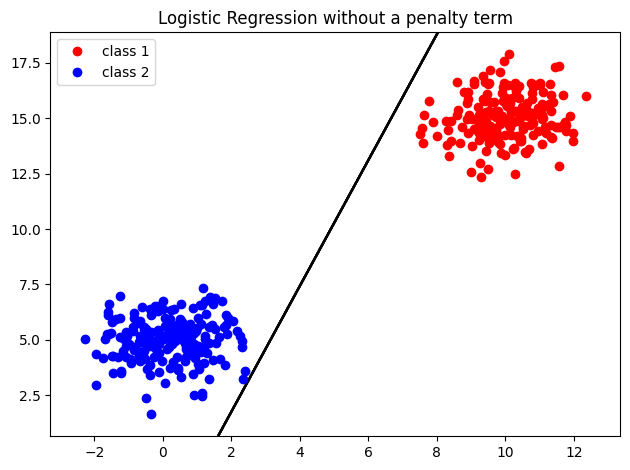

In [2]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty=None,solver="saga",max_iter=int(1e7),random_state=SEED)

LR.fit(X_train, y_train)
print(LR.coef_)
print(LR.intercept_)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1 # by x we mean x1 
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1 # by y we mean x2
xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01)) # as we did in homework 1 !

# notice that np.c_ is very similar to np.concatenate but the good use of np.c_ is that it automatically converts an array say shape 600, to shape 600,1 when concatenating, where as in np.concatenate we need to do that ourselves before concatenating along the axis = 1!
# So notice we can pass xx.ravel() and yy.ravel() to the np.c_ method and it will automatically convert them to N,1 shape and then it will concatenate them column wise !!!
Z = LR.predict(np.c_[xx1.ravel(), xx2.ravel()])
# to be able to use the Z in the contour method it should be reshaped to the same shape as xx1 and xx2 !
Z = Z.reshape(xx1.shape)

plt.contour(xx1, xx2, Z, colors='black', alpha=0.5) # as we did in homework 1 !

#The Generated Points 
plt.plot(CLASS_1[:, 0], CLASS_1[:, 1], 'ro',label = "class 1")
plt.plot(CLASS_2[:, 0], CLASS_2[:, 1], 'bo',label = "class 2")
plt.legend(loc = 'upper left')
plt.title("Logistic Regression without a penalty term")
plt.tight_layout()
plt.show()

Logistic Regression with L1 Loss

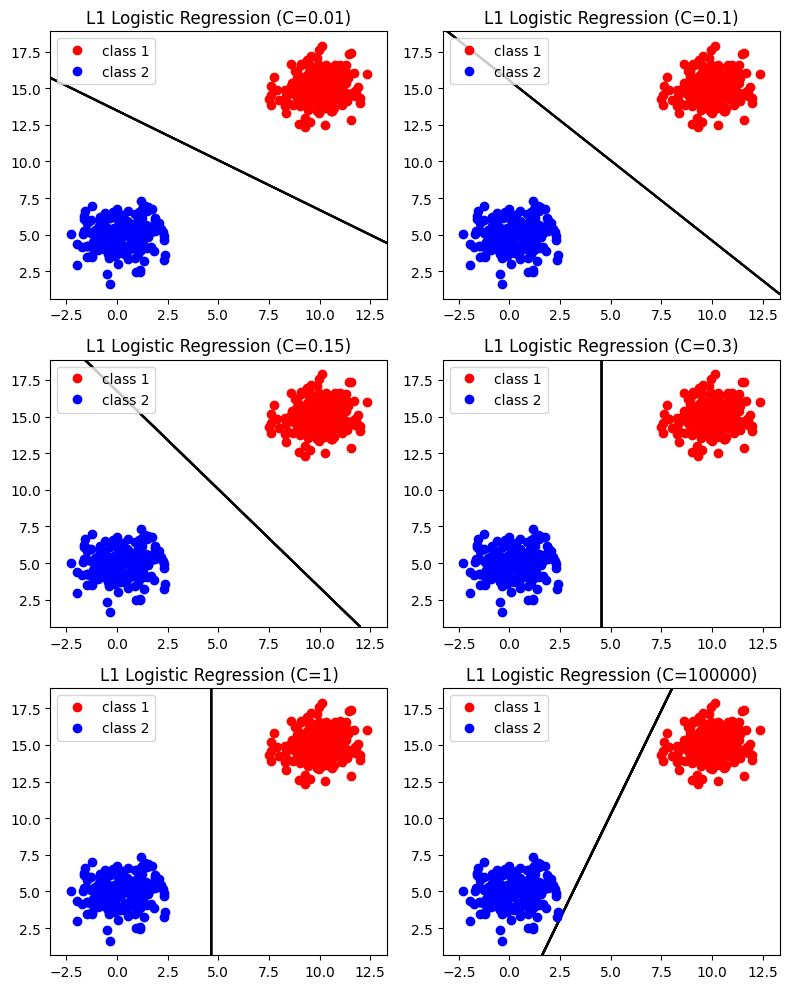

In [3]:
#c represents lambdas
C_values = [0.01, 0.1, 0.15, 0.3,1,100000]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axes = axes.flatten()

for ax, c in zip(axes, C_values):

    LR_l1 = LogisticRegression(penalty='l1', random_state=SEED, solver="saga", max_iter=int(1e7), C=c)
    LR_l1.fit(X_train, y_train)
    
    # as we did in homework 1
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1 # by x we mean x1 
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1 # by y we mean x2
    xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01)) # as we did in h.w. 1
    Z = LR_l1.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    
    ax.contour(xx1, xx2, Z, colors='black', alpha=0.5)
    ax.plot(CLASS_1[:, 0], CLASS_1[:, 1], 'ro', label="class 1")
    ax.plot(CLASS_2[:, 0], CLASS_2[:, 1], 'bo', label="class 2")
    ax.legend(loc='upper left')
    ax.set_title(f"L1 Logistic Regression (C={c})")

plt.tight_layout()
plt.show()

When does the algorithms converges and when not!

In [28]:

LR_l1 = LogisticRegression(penalty=None, random_state=SEED, solver="newton-cholesky", max_iter=int(1e7), C=np.inf)
LR_l1.fit(X_train, y_train)
print(LR_l1.coef_)

[[-1.21986    -1.25990257]]


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Sigmoid Functions 

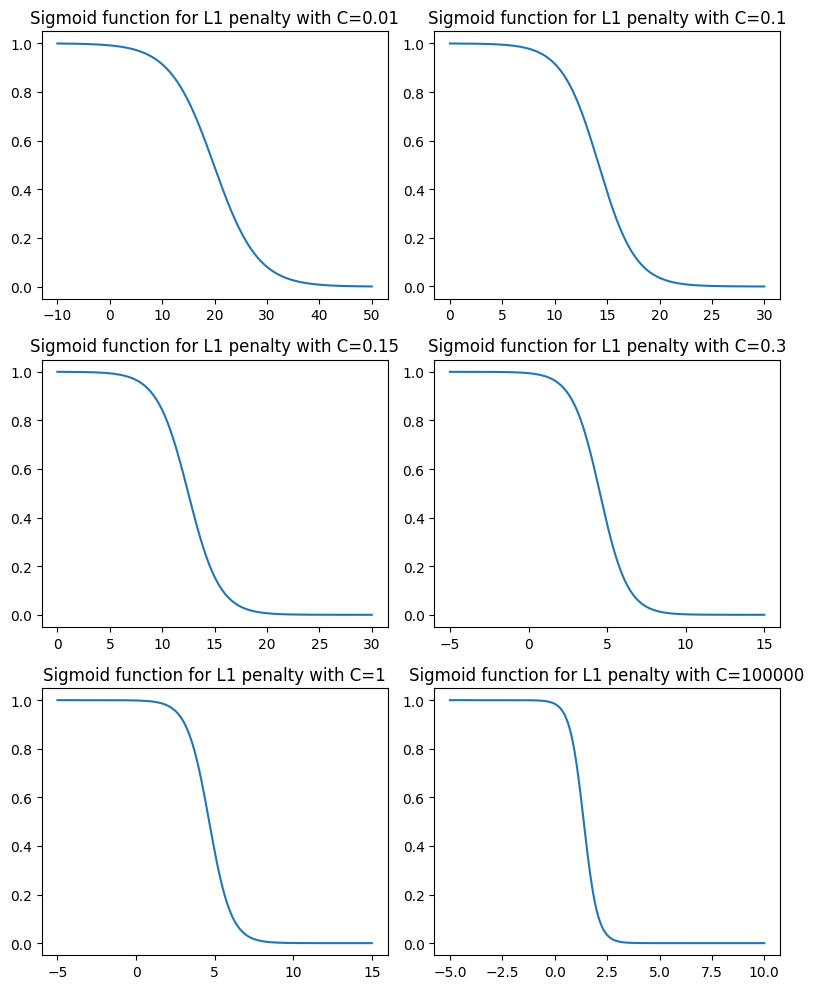

In [4]:
C_values = [0.01, 0.1, 0.15, 0.3,1,100000]
VAL = [(-10,50),(0,30),(0,30),(-5,15),(-5,15),(-5,10)]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axes = axes.flatten()
i = 0
for ax, c in zip(axes, C_values):

    LR_l1 = LogisticRegression(penalty='l1', random_state=SEED, solver="saga", max_iter=int(1e7), C=c)
    LR_l1.fit(X_train, y_train)

    coef_1 = LR_l1.coef_[0]  
    intercept = LR_l1.intercept_  
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    x_values = np.linspace(start=VAL[i][0], stop=VAL[i][1], num=10000)
    z_values = x_values * coef_1[0] + intercept
    probabilities = sigmoid(z_values)
    ax.plot(x_values, probabilities)
    ax.set_title(f"Sigmoid function for L1 penalty with C={c}")
    i+=1

plt.tight_layout()
plt.show()

LDA 

[[-9.15115667 -9.32034998]]
[140.18209503]


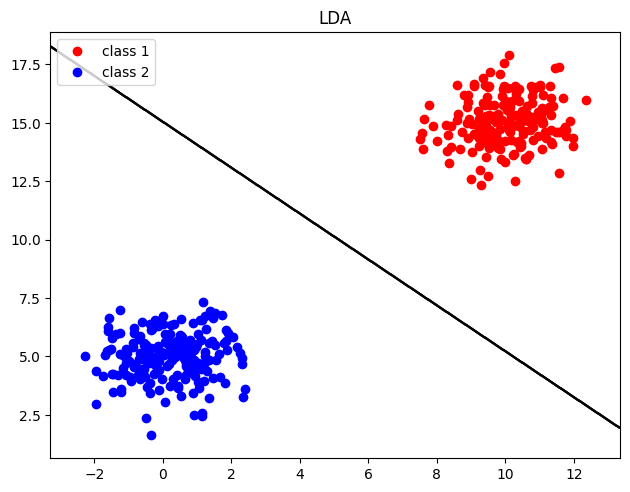

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)

LDA.fit(X_train, y_train)
print(LDA.coef_)
print(LDA.intercept_)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1 # by x we mean x1 
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1 # by y we mean x2
xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01)) # as we did in homework 1 !

Z = LDA.predict(np.c_[xx1.ravel(), xx2.ravel()])
# to be able to use the Z in the contour method it should be reshaped to the same shape as xx1 and xx2 !
Z = Z.reshape(xx1.shape)

plt.contour(xx1, xx2, Z, colors='black', alpha=0.5) # as we did in homework 1 !

#The Generated Points 
plt.plot(CLASS_1[:, 0], CLASS_1[:, 1], 'ro',label = "class 1")
plt.plot(CLASS_2[:, 0], CLASS_2[:, 1], 'bo',label = "class 2")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.title("LDA")
plt.show()